https://dacon.io/competitions/official/236056/overview/description

In [1]:
# ID : 음악 샘플 고유 ID
# 음악 샘플의 특징 정보
# danceability
# energy
# key
# loudness
# speechiness
# acousticness 
# instrumentalness
# liveness
# valence
# tempo
# duration : 음악 재생 시간(길이) (초)
# genre : 음악 장르 (총 15개 종류)

In [2]:
import warnings

warnings.filterwarnings( 'ignore' )

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [4, 3]
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv')
train

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,genre
0,TRAIN_00000,0.3341,0.9231,10,0.8540,0.3797,0.0080,0.0002,0.7697,0.7902,0.5391,175,trap
1,TRAIN_00001,0.6344,0.5955,10,0.2826,0.1378,0.0000,0.7137,0.1597,0.4162,0.3043,513,techno
2,TRAIN_00002,0.3983,0.1107,8,0.2459,0.0247,0.7740,0.0000,0.5105,0.4291,0.2324,151,Trap Metal
3,TRAIN_00003,0.3139,0.9702,2,0.9252,0.9590,0.0371,0.3015,0.2539,0.0577,0.5406,246,trap
4,TRAIN_00004,0.0735,0.9452,5,0.7702,0.1397,0.2583,0.0015,0.1774,0.1128,0.3176,229,Dark Trap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25378,TRAIN_25378,0.8814,0.3398,6,0.4602,0.3825,0.4505,0.0000,0.4222,0.8753,0.4081,88,Underground Rap
25379,TRAIN_25379,0.7505,0.5657,0,0.6682,0.1038,0.1281,0.0000,0.0596,0.9583,0.4273,123,Trap Metal
25380,TRAIN_25380,0.2520,0.7617,8,0.4928,0.0410,0.0003,0.8395,0.0843,0.1372,0.7828,353,dnb
25381,TRAIN_25381,0.6202,0.3455,0,0.6499,0.7960,0.4818,0.0000,0.2007,0.0194,0.9756,120,Dark Trap


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25383 entries, 0 to 25382
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                25383 non-null  object 
 1   danceability      25383 non-null  float64
 2   energy            25383 non-null  float64
 3   key               25383 non-null  int64  
 4   loudness          25383 non-null  float64
 5   speechiness       25383 non-null  float64
 6   acousticness      25383 non-null  float64
 7   instrumentalness  25383 non-null  float64
 8   liveness          25383 non-null  float64
 9   valence           25383 non-null  float64
 10  tempo             25383 non-null  float64
 11  duration          25383 non-null  int64  
 12  genre             25383 non-null  object 
dtypes: float64(9), int64(2), object(2)
memory usage: 2.5+ MB


In [6]:
train.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
count,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000,25383.000000
mean,0.544519,0.642106,5.368239,0.523904,0.271701,0.178736,0.309931,0.324461,0.403999,0.503558,253.697514
std,0.242362,0.275050,3.660011,0.209811,0.276586,0.272155,0.399725,0.254626,0.286148,0.222104,103.020340
min,0.000000,0.000000,0.000000,0.000000,0.001100,0.000000,0.000000,0.000000,0.000000,0.007300,28.000000
25%,0.340500,0.410000,1.000000,0.372900,0.062950,0.003700,0.000000,0.138100,0.148000,0.322350,182.000000
50%,0.553400,0.701300,6.000000,0.538300,0.129600,0.035800,0.006500,0.200700,0.361800,0.483500,227.000000
75%,0.759900,0.895700,9.000000,0.683600,0.450200,0.237500,0.814000,0.501500,0.640800,0.659350,304.000000
max,1.000000,1.000000,11.000000,0.999500,1.000000,0.999900,1.000000,1.000000,1.000000,1.000000,897.000000


In [7]:
train.corr()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
danceability,1.000000,-0.344994,-0.011137,-0.243275,0.206565,0.109230,-0.066573,-0.211654,0.370560,-0.196659,-0.050280
energy,-0.344994,1.000000,0.045034,0.583908,-0.161759,-0.485579,0.322109,0.234945,-0.033774,-0.014481,0.298298
key,-0.011137,0.045034,1.000000,-0.007875,-0.031438,-0.007313,0.070276,0.000197,0.027227,-0.015365,0.069347
loudness,-0.243275,0.583908,-0.007875,1.000000,0.056422,-0.251495,-0.186585,0.184924,0.072919,0.194186,-0.109717
speechiness,0.206565,-0.161759,-0.031438,0.056422,1.000000,0.207697,-0.414764,0.068327,0.246963,0.189870,-0.321667
acousticness,0.109230,-0.485579,-0.007313,-0.251495,0.207697,1.000000,-0.312771,-0.114465,0.131303,0.067047,-0.277882
instrumentalness,-0.066573,0.322109,0.070276,-0.186585,-0.414764,-0.312771,1.000000,-0.039586,-0.263131,-0.223367,0.602052
liveness,-0.211654,0.234945,0.000197,0.184924,0.068327,-0.114465,-0.039586,1.000000,-0.020316,0.038450,-0.014935
valence,0.370560,-0.033774,0.027227,0.072919,0.246963,0.131303,-0.263131,-0.020316,1.000000,0.059902,-0.192495
tempo,-0.196659,-0.014481,-0.015365,0.194186,0.189870,0.067047,-0.223367,0.038450,0.059902,1.000000,-0.166175


corr

energy & loudness 0.58

instrumentalness & duration 0.60

In [8]:
cols = list(train.drop(columns=['ID','genre']).columns)
print(cols)

['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration']


In [9]:
def make_boxplot(cols):
    for col in cols:
        fig, ax = plt.subplots()
        ax.boxplot(train[col])
        plt.title(col)
        plt.show()

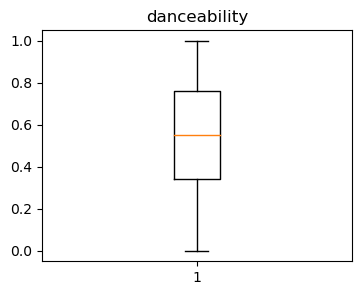

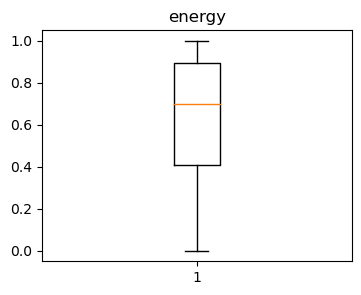

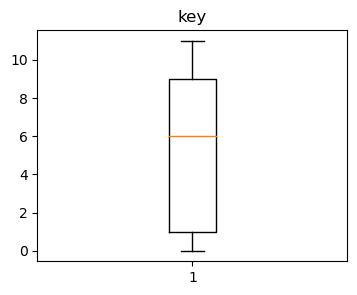

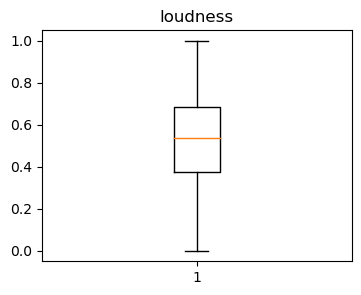

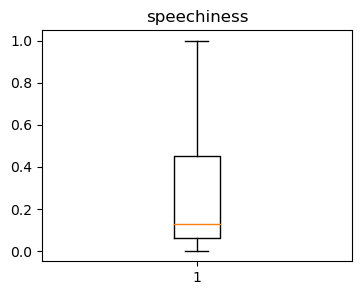

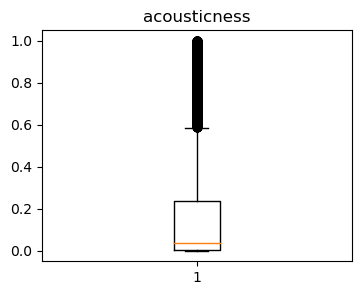

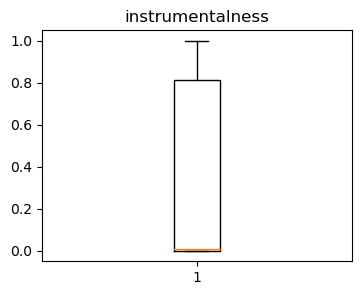

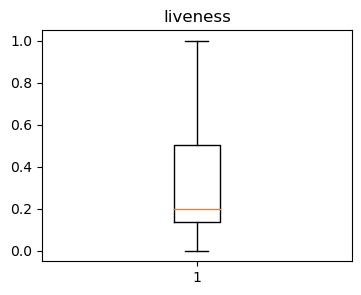

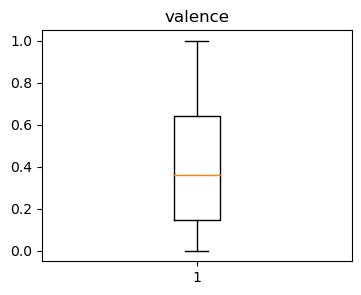

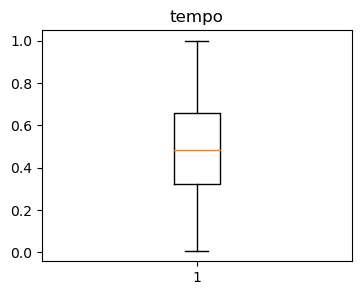

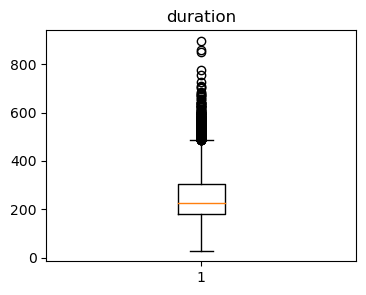

In [10]:
make_boxplot(cols)

In [11]:
train_describe = train.describe()
Q1 = train_describe.loc['25%']
Q3 = train_describe.loc['75%']
IQR = Q3 - Q1
min_lim = Q1 - IQR * 1.5
max_lim = Q3 + IQR * 1.5
max_real = train_describe.loc['max']
min_real = train_describe.loc['min']
print(max_lim < max_real) # 초과 : acousticness, duration 
print('***')
print(min_lim > min_real) # 미만 : 없음

danceability        False
energy              False
key                 False
loudness            False
speechiness         False
acousticness         True
instrumentalness    False
liveness            False
valence             False
tempo               False
duration             True
dtype: bool
***
danceability        False
energy              False
key                 False
loudness            False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration            False
dtype: bool


In [12]:
# 이상치 갯수 확인
print(len(train))
print((train['acousticness'] > max_lim['acousticness']).sum()) # 이상치 2981개 존재
print((train['duration'] > max_lim['duration']).sum()) # 이상치 716개 존재

25383
2981
716


In [13]:
train['genre'].unique()

array(['trap', 'techno', 'Trap Metal', 'Dark Trap', 'Rap',
       'Underground Rap', 'hardstyle', 'RnB', 'trance', 'techhouse',
       'dnb', 'Hiphop', 'Emo', 'psytrance', 'Pop'], dtype=object)

In [14]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['genre'] = encoder.fit_transform(train['genre'])

In [15]:
train['genre'].unique()

array([14, 12,  6,  0,  4,  7,  9,  5, 13, 11,  8,  2,  1, 10,  3])

In [16]:
# 셋 분리
x = train.drop(columns='genre')
y = train['genre']

In [17]:
# 셋 분리
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=10)

In [18]:
# id 삭제/기록
x_val_id = x_val['ID']
x_train = x_train.drop(columns='ID')
y_train = y_train.drop(columns='ID')
x_val = x_val.drop(columns='ID')

In [19]:
x_train_col = list(x_train)

In [20]:
x_train

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
2980,0.8837,0.3838,8,0.7750,0.4870,0.0764,0.0000,0.0905,0.1384,0.8829,208
3198,0.5734,0.1770,1,0.1355,0.6900,0.2086,0.0000,0.0981,0.7660,0.6784,229
18383,0.8417,0.2937,2,0.3729,0.7250,0.6920,0.0029,0.4222,0.2185,0.3049,145
10027,0.3139,0.9598,11,0.7723,0.2296,0.0039,0.4807,0.2428,0.5670,0.5397,220
22068,0.9879,0.5709,1,0.3658,0.7817,0.0697,0.0061,0.0451,0.7030,0.3140,371
...,...,...,...,...,...,...,...,...,...,...,...
9372,0.2015,0.6132,3,0.7461,0.0219,0.0431,0.0000,0.1355,0.1901,0.5394,265
7291,0.5534,0.4966,8,0.4433,0.4818,0.0051,0.0010,0.1615,0.1071,0.3443,163
17728,0.1790,0.8717,5,0.5656,0.0611,0.0011,0.0146,0.8435,0.2437,0.4056,160
7293,0.5061,0.8853,6,0.7192,0.0525,0.3833,0.0531,0.1738,0.1456,0.4285,147


In [21]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((20306, 11), (5077, 11), (20306,), (5077,))

In [22]:
# # 0.6299
# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(x_train, y_train)
# y_val_pred = model.predict(x_val)

In [23]:
# 0.6475
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train)
y_val_pred = model.predict(x_val)

In [24]:
# # 0.6391
# from catboost import CatBoostClassifier
# model = CatBoostClassifier()
# model.fit(x_train, y_train)
# y_val_pred = model.predict(x_val)

In [25]:
# # 0.6449
# import lightgbm as lgb
# model = lgb.LGBMClassifier()
# model.fit(x_train, y_train)
# y_val_pred = model.predict(x_val)

In [26]:
y_val_pred = pd.DataFrame(y_val_pred).rename(columns = {0:'genre'})
y_val_pred

,genre
0,1
1,5
2,7
3,6
4,0
...,...
5072,12
5073,12
5074,4
5075,0


In [27]:
##### 모델 스코어 확인 
from sklearn.metrics import f1_score
print('score:' , f1_score(y_val, y_val_pred, average='macro'))

score: 0.6475705273449078


In [28]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.metrics import mean_absolute_error

In [29]:
# XGB 하이퍼 파라미터들 값 지정
def objectiveXGB(trial: Trial, X, y, test):
    param = {
        'n_estimators' : trial.suggest_int('n_estimators', 500, 4000),
        'max_depth' : trial.suggest_int('max_depth', 8, 16),
        'min_child_weight' : trial.suggest_int('min_child_weight', 1, 300),
        'gamma' : trial.suggest_int('gamma', 1, 3),
        'learning_rate' : 0.01,
        'colsample_bytree' : trial.suggest_discrete_uniform('colsample_bytree', 0.5, 1, 0.1),
        'nthread' : -1,
        'tree_method' : 'gpu_hist', # gpu 사용
        'predictor' : 'gpu_predictor', # gpu 사용
        'lambda' : trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha' : trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'subsample' : trial.suggest_categorical('subsample', [0.6,0.7,0.8,1.0]),
        'random_state' : 42
    }
    
    # 학습 모델 생성
    model = XGBClassifier(**param)
    xgb_model = model.fit(x_train, y_train, verbose=True) # 학습 진행
    
    # 모델 성능 확인
    # score = mean_absolute_error(xgb_model.predict(x_val), y_val)
    score = f1_score(xgb_model.predict(x_val), y_val, average='macro')
    
    return score

In [30]:
# f1 가 최대가 되는 방향으로 학습을 진행 o
# TPESampler : Sampler using TPE (Tree-structured Parzen Estimator) algorithm.
study = optuna.create_study(direction='maximize', sampler=TPESampler())

# n_trials 지정해주지 않으면, 무한 반복
study.optimize(lambda trial : objectiveXGB(trial, x_train, y_train, x_val), n_trials = 100) # 50

print('Best trial : score {}, \nparams {}'.format(study.best_trial.value, study.best_trial.params))


[I 2023-02-03 01:43:36,591] A new study created in memory with name: no-name-9e55ac87-2f79-4d94-a1bc-34200b94055b
[I 2023-02-03 01:44:20,928] Trial 0 finished with value: 0.5937453412649017 and parameters: {'n_estimators': 1440, 'max_depth': 11, 'min_child_weight': 238, 'gamma': 1, 'colsample_bytree': 0.7, 'lambda': 0.03972542211565023, 'alpha': 0.02660054249559949, 'subsample': 0.8}. Best is trial 0 with value: 0.5937453412649017.
[I 2023-02-03 01:45:17,301] Trial 1 finished with value: 0.6511054869852064 and parameters: {'n_estimators': 1116, 'max_depth': 8, 'min_child_weight': 2, 'gamma': 1, 'colsample_bytree': 1.0, 'lambda': 0.06647769673850855, 'alpha': 0.0031950708686134207, 'subsample': 0.8}. Best is trial 1 with value: 0.6511054869852064.
[I 2023-02-03 01:45:55,933] Trial 2 finished with value: 0.6014706995807284 and parameters: {'n_estimators': 1232, 'max_depth': 15, 'min_child_weight': 231, 'gamma': 3, 'colsample_bytree': 0.9, 'lambda': 0.004603469737898063, 'alpha': 0.007410

KeyboardInterrupt: 

In [31]:
optuna.visualization.plot_param_importances(study) # 파라미터 중요도 확인 그래프

In [32]:
optuna.visualization.plot_optimization_history(study) # 최적화 과정 시각화

In [33]:
model = XGBClassifier(**study.best_trial.params)
model.fit(x_train, y_train)

XGBClassifier(alpha=0.001498788390751351, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=9.713572700385038,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=60, missing=nan,
              monotone_constraints=None, n_estimators=1795, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
y_val_pred = model.predict(x_val)
print('score:' , f1_score(y_val, y_val_pred, average='macro'))

score: 0.62915573755111


제출용

In [35]:
# val 데이터까지 재학습
model.fit(x.drop(columns='ID'), y)

XGBClassifier(alpha=0.001498788390751351, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=9.713572700385038,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
              max_leaves=None, min_child_weight=60, missing=nan,
              monotone_constraints=None, n_estimators=1795, n_jobs=None,
              num_parallel_tree=None, ...)

In [36]:
test = pd.read_csv('test.csv')
test

,ID,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration
0,TEST_00000,0.8861,0.6821,2,0.7241,0.3103,0.1451,0.0000,0.5087,0.8863,0.9648,279
1,TEST_00001,0.8495,0.3883,1,0.4495,0.4661,0.6234,0.0004,0.1347,0.4062,0.9051,151
2,TEST_00002,0.2479,0.7549,3,0.7683,0.3131,0.5718,0.0000,0.1250,0.6357,0.3234,196
3,TEST_00003,0.6344,0.9804,1,0.6599,0.0931,0.0020,0.6016,0.8799,0.8790,0.2946,207
4,TEST_00004,0.6237,0.6926,6,0.6716,0.0269,0.0283,0.0001,0.1580,0.9288,0.3642,196
...,...,...,...,...,...,...,...,...,...,...,...,...
16917,TEST_16917,0.5461,0.8686,1,0.6351,0.0656,0.0010,0.8888,0.0047,0.8250,0.2672,161
16918,TEST_16918,0.8443,0.4194,4,0.5065,0.4315,0.1637,0.0241,0.0749,0.9482,0.9186,289
16919,TEST_16919,0.3373,0.9202,10,0.7272,0.4502,0.0791,0.0001,0.1881,0.0992,0.5953,212
16920,TEST_16920,0.4017,0.9741,9,0.6272,0.0768,0.0001,0.8718,0.6649,0.4463,0.4841,617


In [37]:
x_test_id = test['ID']
x_test = test.drop(columns='ID')

In [38]:
# 예측
y_test_pred = model.predict(x_test)

In [39]:
y_test_pred = encoder.inverse_transform(y_test_pred)
y_test_pred = pd.DataFrame(y_test_pred).rename(columns = {0:'genre'})
y_test_pred

,genre
0,Underground Rap
1,Dark Trap
2,Emo
3,techhouse
4,Pop
...,...
16917,techhouse
16918,Hiphop
16919,hardstyle
16920,psytrance


In [40]:
final = pd.concat([x_test_id, y_test_pred],axis=1)
final

,ID,genre
0,TEST_00000,Underground Rap
1,TEST_00001,Dark Trap
2,TEST_00002,Emo
3,TEST_00003,techhouse
4,TEST_00004,Pop
...,...,...
16917,TEST_16917,techhouse
16918,TEST_16918,Hiphop
16919,TEST_16919,hardstyle
16920,TEST_16920,psytrance


In [41]:
final.to_csv('submission_xgb_optuna.csv',index=False)
pd.read_csv('submission_xgb_optuna.csv')

,ID,genre
0,TEST_00000,Underground Rap
1,TEST_00001,Dark Trap
2,TEST_00002,Emo
3,TEST_00003,techhouse
4,TEST_00004,Pop
...,...,...
16917,TEST_16917,techhouse
16918,TEST_16918,Hiphop
16919,TEST_16919,hardstyle
16920,TEST_16920,psytrance
